In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Đọc dữ liệu đầu vào

In [2]:
data_df = pd.read_csv("../data/coronavirus/coronavirus0428.csv", index_col="Country,Other")[-222:]
data_df.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,Continent,New Cases/1M pop
"Country,Other",,,,,,,,,,,,,,,,,
USA,"32,927,091",NaN,"587,384",NaN,"25,521,913",NaN,"6,817,794","9,863","99,000","1,766","442,210,652","1,329,575","332,595,570",2021-04-28,105661,North America,NaN
India,"17,988,637",NaN,"201,165",NaN,"14,807,704",NaN,"2,979,768","8,944","12,931",145,"280,979,877","201,981","1,391,123,637",2021-04-28,"776,9155",Asia,NaN
Brazil,"14,446,541",NaN,"395,324",NaN,"12,992,442",NaN,"1,058,775","8,318","67,571","1,849","43,538,104","203,640","213,798,900",2021-04-28,155415,South America,NaN
France,"5,534,313",NaN,"103,603",NaN,"4,441,986",NaN,"988,724","5,943","84,633","1,584","75,122,498","1,148,799","65,392,188",2021-04-28,126311,Europe,NaN
Russia,"4,779,425",NaN,"108,980",NaN,"4,402,678",NaN,"267,767","2,300","32,739",747,"128,200,000","878,167","145,985,907",2021-04-28,"311,3401",Europe,NaN


In [3]:
data_df.shape

(222, 17)

In [4]:
data_df.dtypes

TotalCases                                               object
NewCases                                                 object
TotalDeaths                                              object
NewDeaths                                                object
TotalRecovered                                           object
NewRecovered                                             object
ActiveCases                                              object
Serious,Critical                                         object
Tot Cases/1M pop                                         object
Deaths/1M pop                                            object
TotalTests                                               object
Tests/1M pop                                             object
Population                                               object
Date                                                     object
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl     object
Continent                               

In [5]:
obj_col = set(data_df.select_dtypes(include=['object']).columns)-set(["Date"])
def convert(df):
    if df.name in obj_col:
        df = pd.to_numeric(df.str.replace(",", ""), errors='coerce')
    return df
data_df=data_df.apply(convert)

In [6]:
data_df.dtypes

TotalCases                                                int64
NewCases                                                float64
TotalDeaths                                             float64
NewDeaths                                               float64
TotalRecovered                                            int64
NewRecovered                                            float64
ActiveCases                                               int64
Serious,Critical                                        float64
Tot Cases/1M pop                                        float64
Deaths/1M pop                                           float64
TotalTests                                              float64
Tests/1M pop                                            float64
Population                                              float64
Date                                                     object
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl    float64
Continent                               

In [7]:
data_df.isna().sum()

TotalCases                                                0
NewCases                                                211
TotalDeaths                                              15
NewDeaths                                               214
TotalRecovered                                            0
NewRecovered                                            211
ActiveCases                                               0
Serious,Critical                                         74
Tot Cases/1M pop                                          2
Deaths/1M pop                                            17
TotalTests                                               12
Tests/1M pop                                             12
Population                                                2
Date                                                      0
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl      2
Continent                                               222
New Cases/1M pop                        

In [8]:
def missing_ratio(df):
    return df.isna().sum()/len(df)

missing_ratio = data_df.loc[:,data_df.columns != "Date"].apply(missing_ratio)#.apply('{:.3%}'.format)
sum=  data_df.loc[:,data_df.columns != "Date"].agg('sum').apply('{:3}'.format)
info_df = pd.DataFrame([missing_ratio, sum], index=["Missing Ratio", "Sum"])
info_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,Continent,New Cases/1M pop
Missing Ratio,0,0.95045,0.0675676,0.963964,0,0.95045,0,0.333333,0.00900901,0.0765766,0.0540541,0.0540541,0.00900901,0.00900901,1,0.95045
Sum,149338174.0,19007.0,3148894.0,749.0,127497405.0,39849.0,18691875.0,111279.0,6751146.0,111466.7,2148911686.0,128279052.0,7821250427.0,186258872234360.0,0.0,1043.01


In [9]:
pd.options.display.float_format = '{:.2f}'.format
data_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,Continent,New Cases/1M pop
"Country,Other",,,,,,,,,,,,,,,,,
USA,32927091,nan,587384.00,nan,25521913,nan,6817794,9863.00,99000.00,1766.00,442210652.00,1329575.00,332595570.00,2021-04-28,105661.00,nan,nan
India,17988637,nan,201165.00,nan,14807704,nan,2979768,8944.00,12931.00,145.00,280979877.00,201981.00,1391123637.00,2021-04-28,7769155.00,nan,nan
Brazil,14446541,nan,395324.00,nan,12992442,nan,1058775,8318.00,67571.00,1849.00,43538104.00,203640.00,213798900.00,2021-04-28,155415.00,nan,nan
France,5534313,nan,103603.00,nan,4441986,nan,988724,5943.00,84633.00,1584.00,75122498.00,1148799.00,65392188.00,2021-04-28,126311.00,nan,nan
Russia,4779425,nan,108980.00,nan,4402678,nan,267767,2300.00,32739.00,747.00,128200000.00,878167.00,145985907.00,2021-04-28,3113401.00,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,4,nan,nan,nan,4,nan,0,nan,67.00,nan,nan,nan,59518.00,2021-04-28,14880.00,nan,nan
Samoa,3,nan,nan,nan,2,nan,1,nan,15.00,nan,nan,nan,199496.00,2021-04-28,66499.00,nan,nan
Saint Helena,2,nan,nan,nan,2,nan,0,nan,328.00,nan,nan,nan,6092.00,2021-04-28,3046.00,nan,nan


In [10]:
# data_df.fillna(data_df.mean(), inplace=True)
data_df.sort_values(by="TotalCases", ascending=False)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,Continent,New Cases/1M pop
"Country,Other",,,,,,,,,,,,,,,,,
USA,32927091,nan,587384.00,nan,25521913,nan,6817794,9863.00,99000.00,1766.00,442210652.00,1329575.00,332595570.00,2021-04-28,105661.00,nan,nan
India,17988637,nan,201165.00,nan,14807704,nan,2979768,8944.00,12931.00,145.00,280979877.00,201981.00,1391123637.00,2021-04-28,7769155.00,nan,nan
Brazil,14446541,nan,395324.00,nan,12992442,nan,1058775,8318.00,67571.00,1849.00,43538104.00,203640.00,213798900.00,2021-04-28,155415.00,nan,nan
France,5534313,nan,103603.00,nan,4441986,nan,988724,5943.00,84633.00,1584.00,75122498.00,1148799.00,65392188.00,2021-04-28,126311.00,nan,nan
Russia,4779425,nan,108980.00,nan,4402678,nan,267767,2300.00,32739.00,747.00,128200000.00,878167.00,145985907.00,2021-04-28,3113401.00,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,4,nan,1.00,nan,3,nan,0,nan,13.00,3.00,470.00,1502.00,312997.00,2021-04-28,78249312997666.00,nan,nan
Marshall Islands,4,nan,nan,nan,4,nan,0,nan,67.00,nan,nan,nan,59518.00,2021-04-28,14880.00,nan,nan
Samoa,3,nan,nan,nan,2,nan,1,nan,15.00,nan,nan,nan,199496.00,2021-04-28,66499.00,nan,nan


In [11]:
# # data_df["TotalCases"].plot(kind='pie')
# threshold = 2504206
# part = data_df[data_df["TotalCases"] >=threshold]["TotalCases"]
# other = pd.Series({"Other":data_df[data_df["TotalCases"] <threshold]["TotalCases"].sum()})
# total=pd.concat([part, other])
# ax=total.plot.pie(autopct='%1.1f%%', figsize=(25, 10), labels=None, legend='best')
# plt.title("Tỉ lệ số ca mắc bệnh trên toàn thế giới theo các nước")
# plt.show()
# # ax.text(x=total.index, y= total.values, s=total)


In [12]:
data_df["TotalCases"]/data_df["Population"]*10**7

Country,Other
USA                990003.90
India              129310.12
Brazil             675706.98
France             846326.32
Russia             327389.48
                      ...   
Marshall Islands      672.07
Samoa                 150.38
Saint Helena         3282.99
Micronesia             86.20
China                 629.62
Length: 222, dtype: float64

In [13]:
# death=data_df.iloc[:15,1].sort_values(ascending=True)
# plt.figure(figsize=(12, 6))
# ax=sns.barplot(y=death.index, x = death.values, orient="h")
# ax.set_title("Tổng số người chết tại một số nước trên thế giới")
# # plt.title("Tổng số người chết tại một số nước trên thế giới")

Chọn các thuộc tính TotalCasess, TotalDeaths, TotalRecovered, ActiveCases, TotalTests, Population

In [14]:
df = data_df[["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population"]]
df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
count,222.00,207.00,222.00,222.00,148.00,210.00,220.00
mean,672694.48,15212.05,574312.64,84197.64,751.89,10232912.79,35551138.30
std,2790008.38,55973.64,2256545.92,509705.61,1731.60,40658857.04,140031778.25
min,1.00,1.00,1.00,0.00,1.00,470.00,803.00
25%,4575.75,99.00,3663.50,186.00,12.00,118627.75,632760.75
50%,39178.50,767.00,32752.00,3535.50,76.50,903700.50,6562631.00
75%,298560.00,6155.00,253015.50,24283.75,535.25,4684716.75,24118483.50
max,32927091.00,587384.00,25521913.00,6817794.00,9863.00,442210652.00,1439323776.00


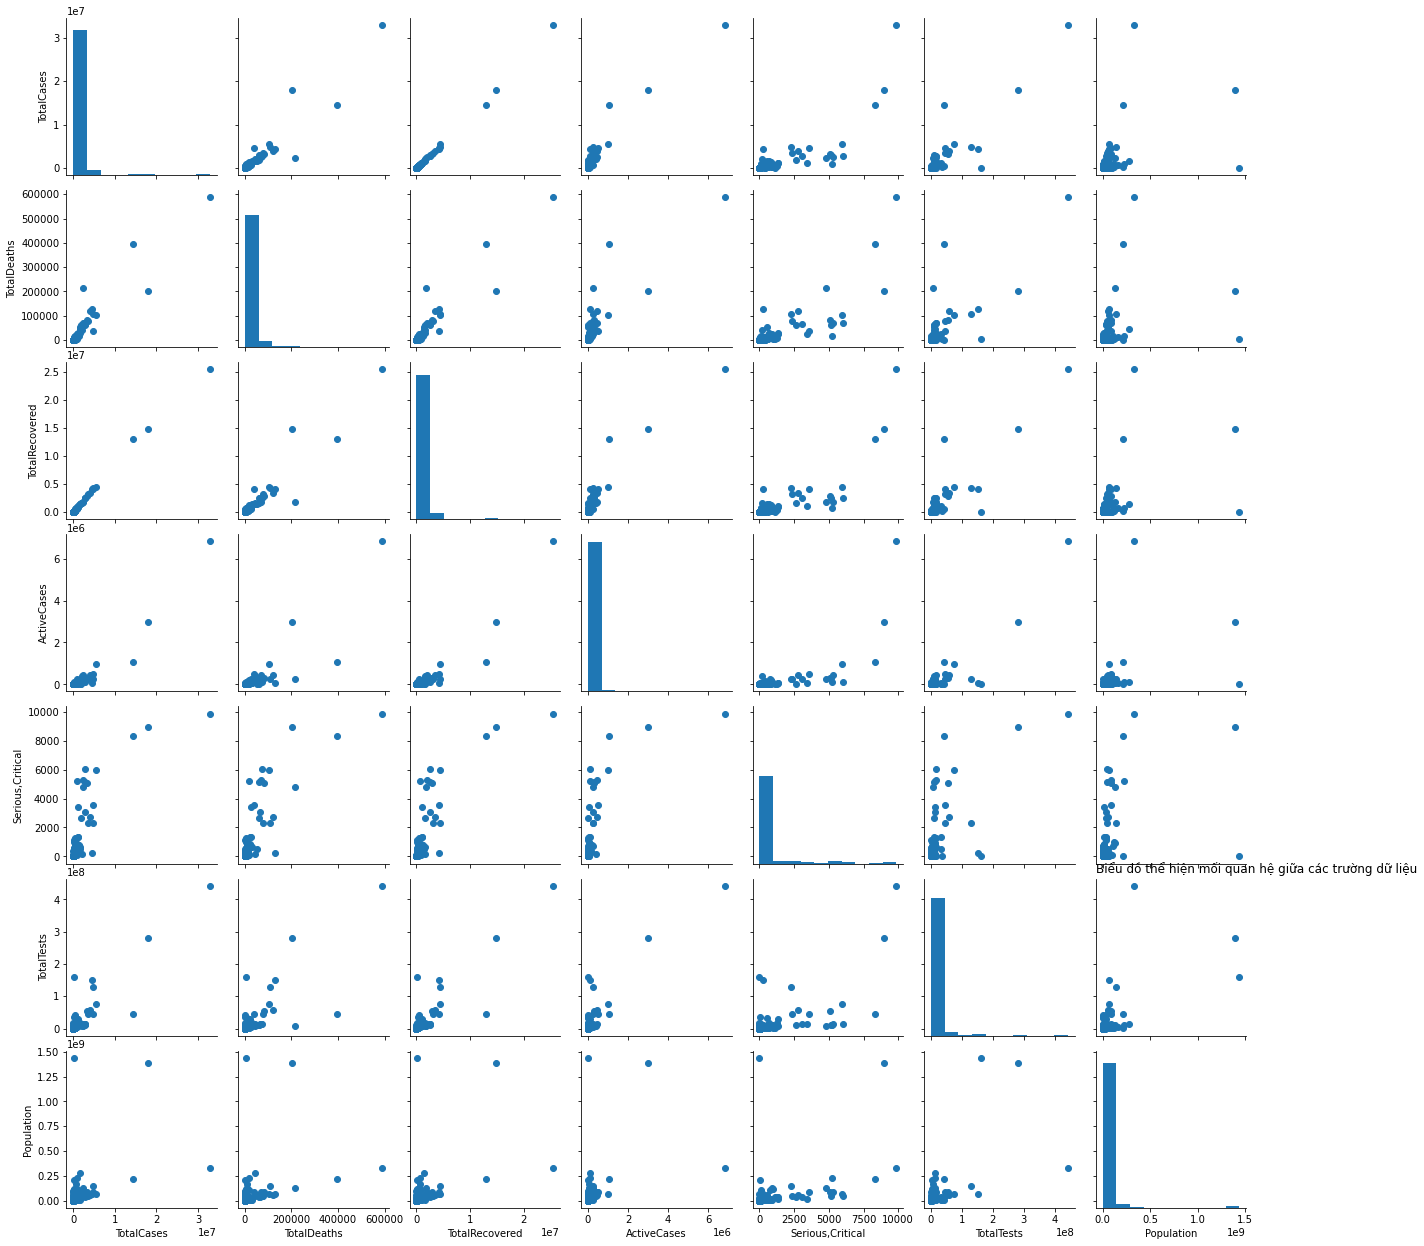

In [15]:
g = sns.PairGrid(df)
# g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

# Các trường dữ liệu

- Đễ dàng biểu diễn. ta chỉ chọn ra top 10 quốc gia, vùng lãnh thổ có số ca lây nhiễm lớn

In [16]:
df_10 = data_df.sort_values(by="TotalCases", ascending=False).head(10)
# df_10

In [17]:
def draw(df, top, col):
    data=df.sort_values(by=col, ascending=False)[:top]
    fig, axs =plt.subplots(1,2)
    fig.tight_layout()
    title_ = "Top " + str(top) + " of "+ col
    data[col].plot(kind='barh',figsize=(20, 6), title=title_, color='green', ax=axs[0])
    data[col].plot(kind='pie', autopct='%1.1f%%',figsize=(20, 6), labels=None, ax=axs[1], legend='auto')
    plt.show()
top=10

## Trường dữ liệu TotalDeaths

In [18]:
feature = "TotalDeaths"
print("Một số tính chất của TotalDeaths")
df[feature].describe()

Một số tính chất của TotalDeaths


count      207.00
mean     15212.05
std      55973.64
min          1.00
25%         99.00
50%        767.00
75%       6155.00
max     587384.00
Name: TotalDeaths, dtype: float64

Text(0.5, 0, 'TotalDeaths')

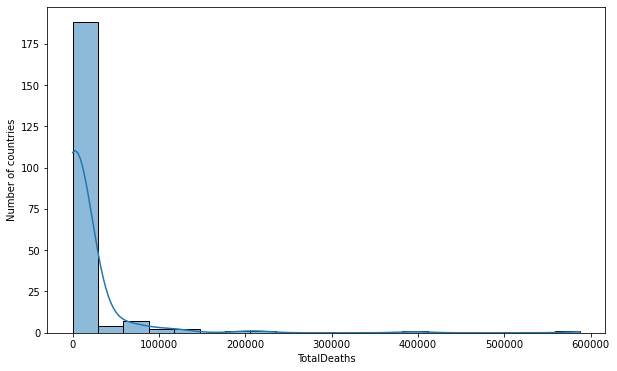

In [19]:
# df[feature].hist()
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

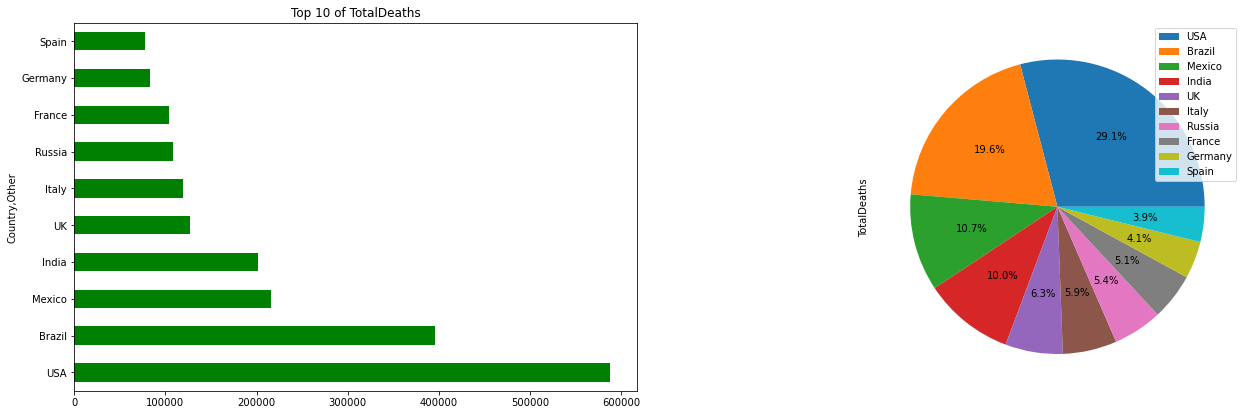

In [20]:
draw(df, top, feature)

## Trường dữ liệu TotalCases

In [21]:
feature = "TotalCases"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalCases


count        222.00
mean      672694.48
std      2790008.38
min            1.00
25%         4575.75
50%        39178.50
75%       298560.00
max     32927091.00
Name: TotalCases, dtype: float64

Text(0.5, 0, 'TotalCases')

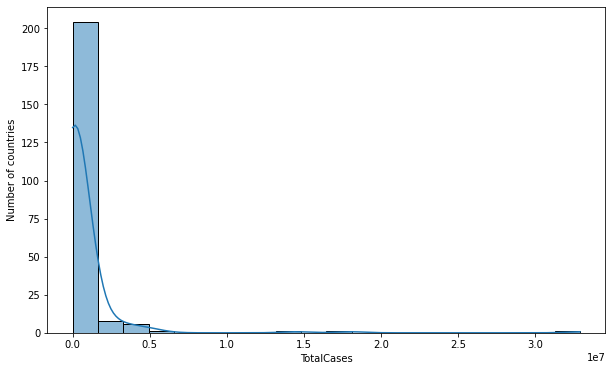

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

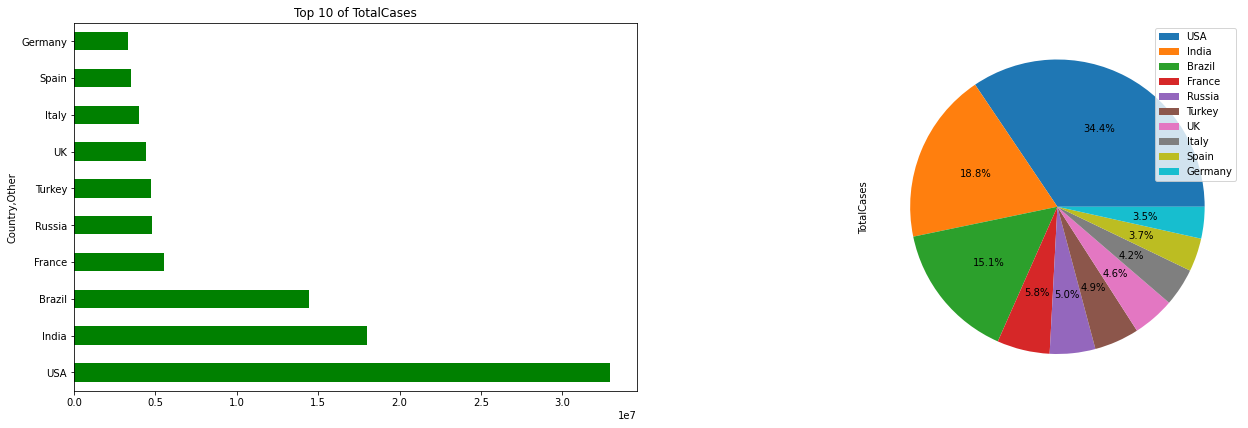

In [23]:
draw(df, top, feature)

## Trường dữ liệu TotalRecovered

In [24]:
feature = "TotalRecovered"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalRecovered


count        222.00
mean      574312.64
std      2256545.92
min            1.00
25%         3663.50
50%        32752.00
75%       253015.50
max     25521913.00
Name: TotalRecovered, dtype: float64

Text(0.5, 0, 'TotalRecovered')

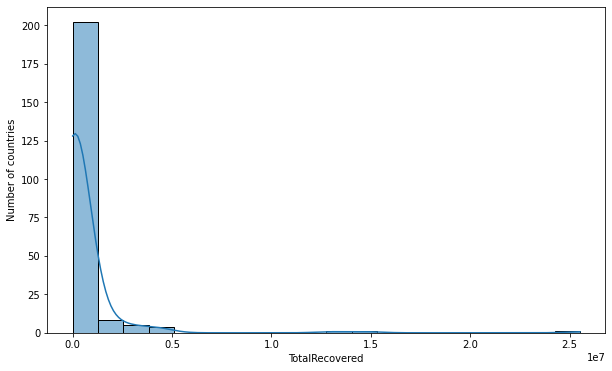

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

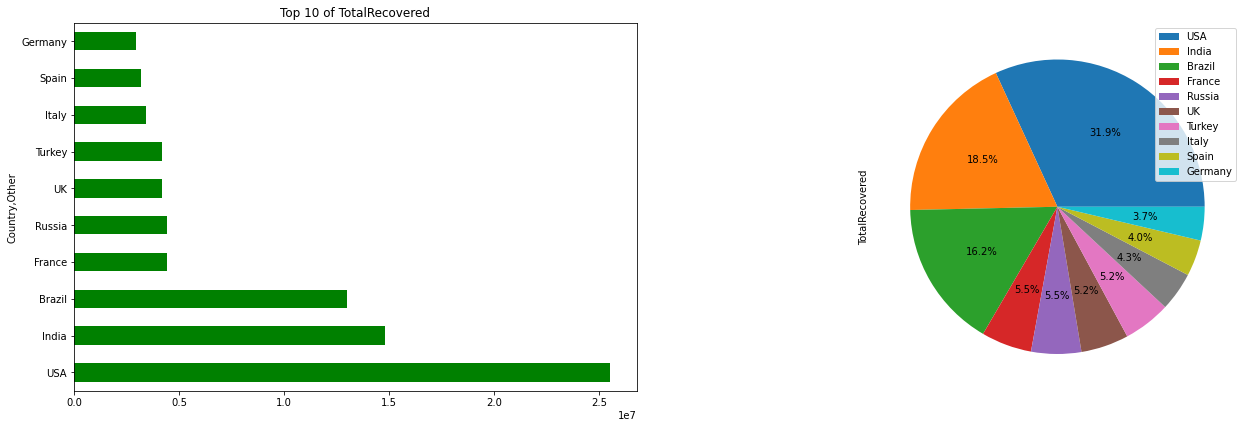

In [26]:
draw(df, top, feature)

## Trường dữ liệu ActiveCases

In [27]:
feature = "ActiveCases"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của ActiveCases


count       222.00
mean      84197.64
std      509705.61
min           0.00
25%         186.00
50%        3535.50
75%       24283.75
max     6817794.00
Name: ActiveCases, dtype: float64

Text(0.5, 0, 'ActiveCases')

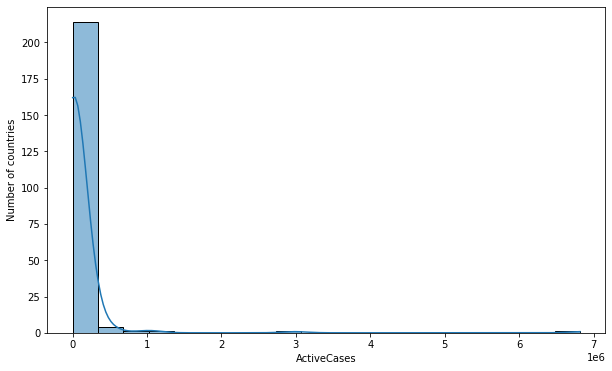

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

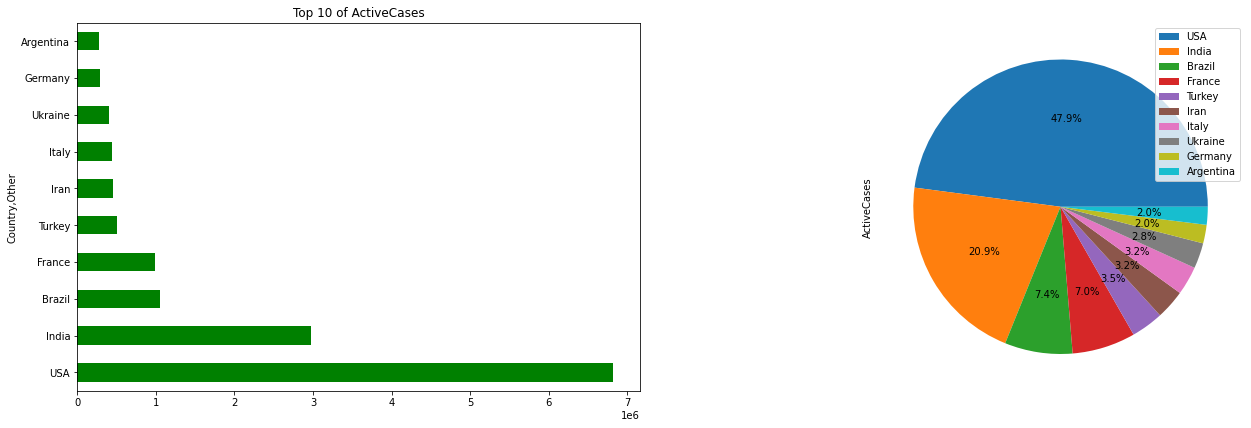

In [29]:
draw(df, top, "ActiveCases")

 ## Trường dữ liệu TotalTests

In [30]:
feature = "TotalTests"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalTests


count         210.00
mean     10232912.79
std      40658857.04
min           470.00
25%        118627.75
50%        903700.50
75%       4684716.75
max     442210652.00
Name: TotalTests, dtype: float64

Text(0.5, 0, 'TotalTests')

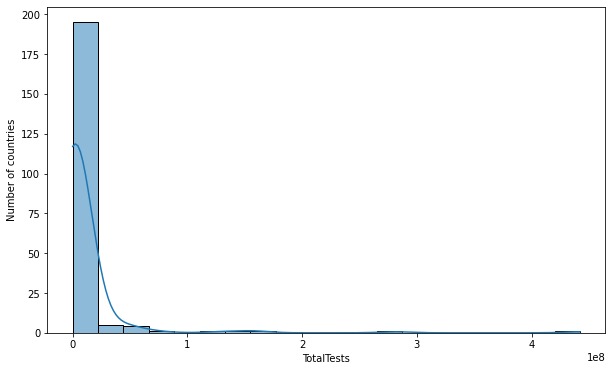

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

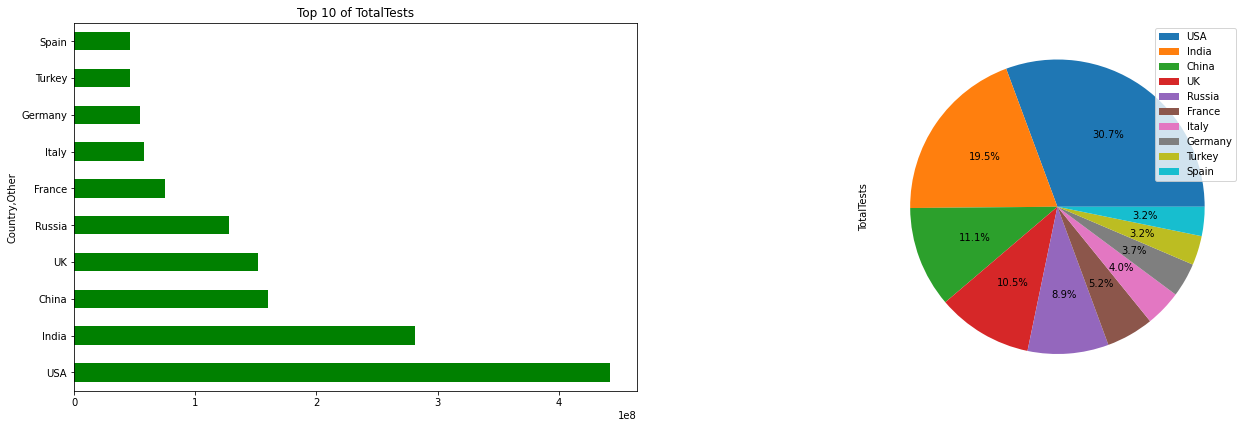

In [32]:
draw(df, top, "TotalTests")

## Trường dữ liệu Population

In [33]:
feature = "Population"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của Population


count          220.00
mean      35551138.30
std      140031778.25
min            803.00
25%         632760.75
50%        6562631.00
75%       24118483.50
max     1439323776.00
Name: Population, dtype: float64

Text(0.5, 0, 'Population')

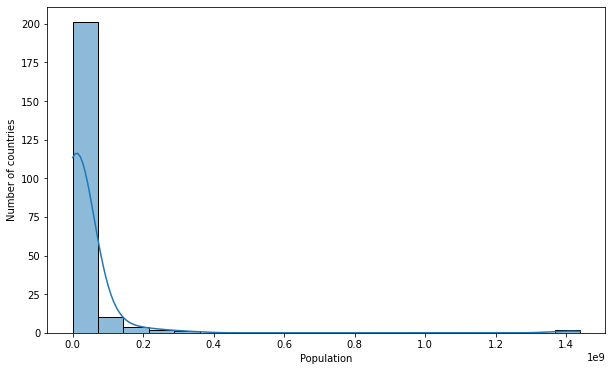

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

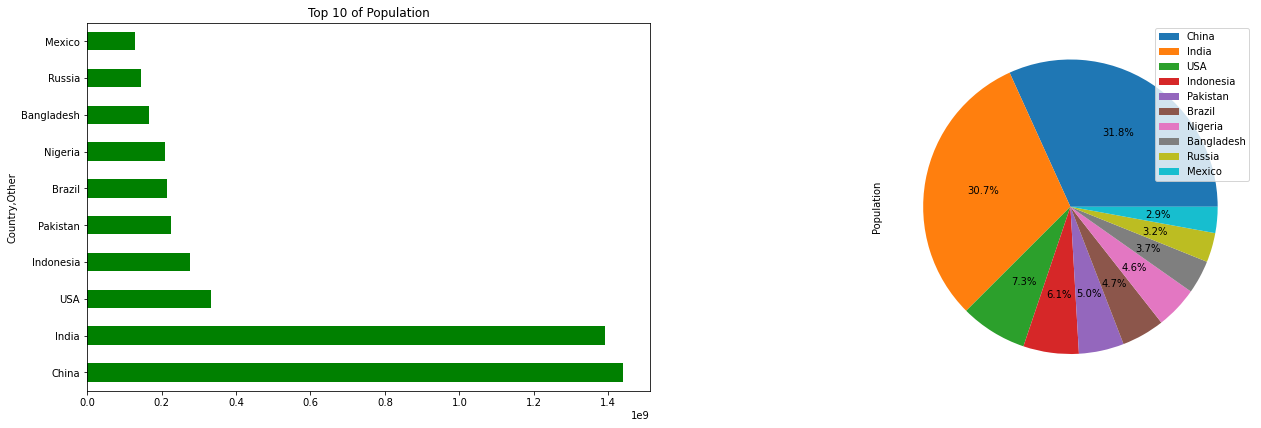

In [35]:
draw(df, top, "Population")

# Mối quan hệ giữa các trường dữ liệu

## Mối tương quan theo cặp

In [36]:
# corr = df.corr()
# # corr
# sns.set_theme()
# plt.figure(figsize=(10, 10))
# # mask = np.zeros_like(corr)
# # mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(
#     corr, 
#     annot=True,
#     vmin=-1, vmax=1, center=0,
#     cmap = 'Greens',
# #     cmap=sns.diverging_palette(20, 20, n=240),
# #     mask = mask,
#     square=True,
    
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

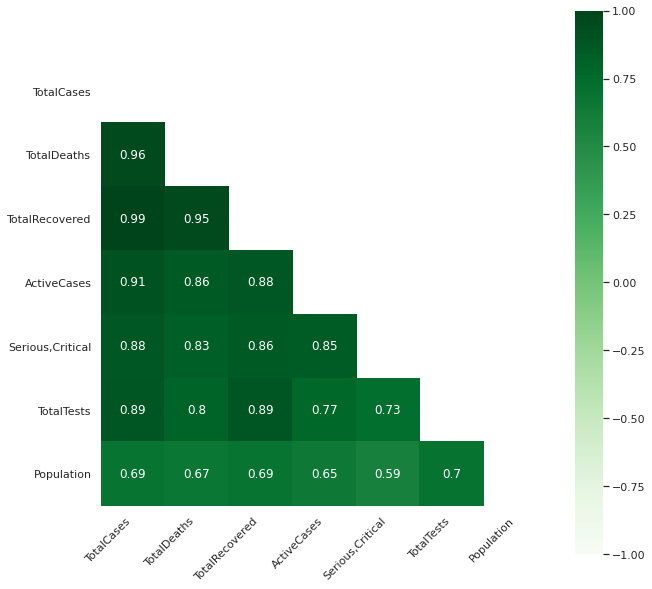

In [37]:
corr = df.corr(method='spearman')
# corr
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap = 'Greens',
#     cmap=sns.diverging_palette(20, 20, n=240),
    mask = mask,
    square=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

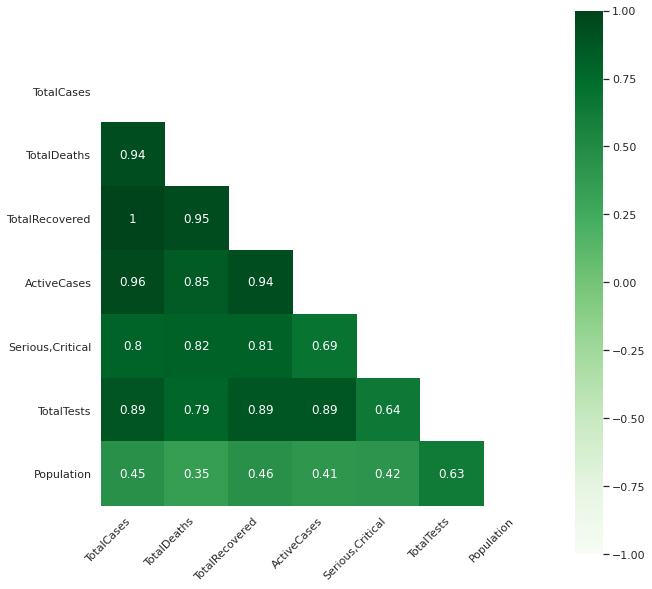

In [38]:
corr = df.corr(method='pearson')
# corr
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap = 'Greens',
#     cmap=sns.diverging_palette(20, 20, n=240),
    mask = mask,
    square=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

$\rightarrow$ Dựa vào biểu đồ heatmap của corr, ta thấy, TotalDeaths-TotalCases, TotalRecovered-TotalCases, TotalRecovered-TotalDeaths, ActiveCases-TotalCases, ActiveCases-TotalRecovered có hệ số tương quan lớn ( > 0.9) \
$\rightarrow$ có khả năng đồng biến với nhau

In [39]:
def corr(X, Y):
    x = X.fillna(X.mean())
    y = Y.fillna(X.mean())
    print(scipy.stats.kendalltau(x, y))
    slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
    fig, ax=plt.subplots(figsize=(8, 6))
    ax.plot(x,y,linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x,label=line)
    ax.set_xlabel(X.name)
    ax.set_ylabel(Y.name)
    ax.legend(facecolor='white')
    plt.show()

### TotalCases và TotalDeaths

KendalltauResult(correlation=0.645557188171112, pvalue=3.1648326690154037e-46)


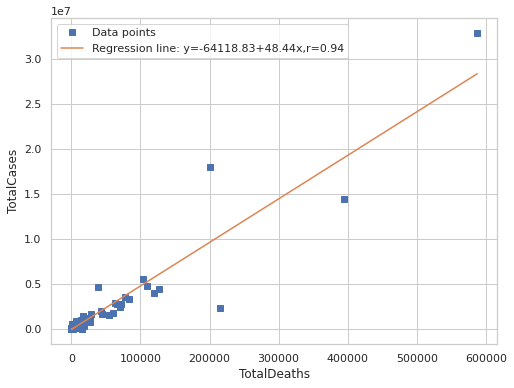

In [40]:
Y = df["TotalCases"]
X = df["TotalDeaths"]
corr(X, Y)

### TotalCases và TotalTest

KendalltauResult(correlation=0.5989718136435797, pvalue=3.708969342677852e-40)


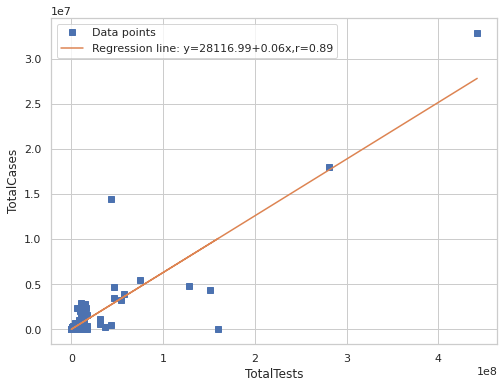

In [41]:
X = df["TotalTests"]
Y=df["TotalCases"]
corr(X, Y)

### TotalCases và TotalRecovered

KendalltauResult(correlation=0.9553766198683171, pvalue=1.3958181464752445e-99)


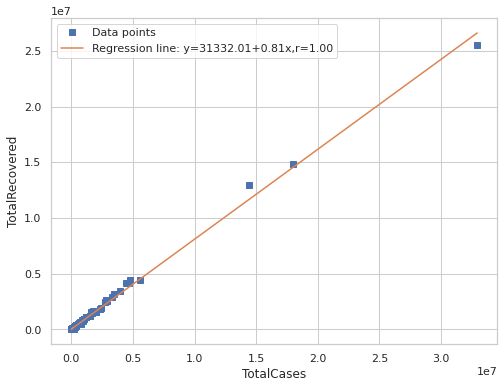

In [42]:
X = df["TotalCases"]
Y = df["TotalRecovered"]
corr(X, Y)

### TotalCases và ActiveCases

KendalltauResult(correlation=0.7495465851350475, pvalue=7.349209675574031e-62)


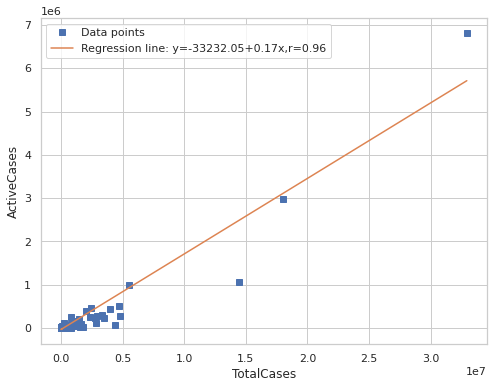

In [43]:
X= df["TotalCases"]
Y=df["ActiveCases"]
corr(X, Y)

### ActiveCases và TotalRecovered

KendalltauResult(correlation=0.7051697142614244, pvalue=5.9134047225679245e-55)


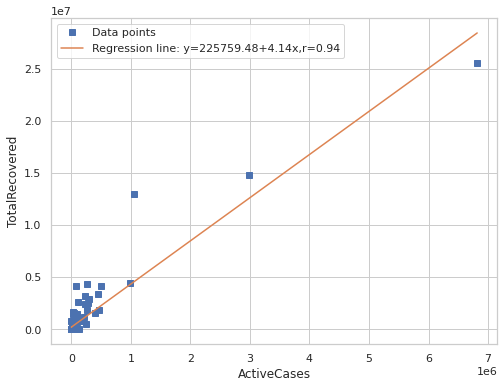

In [44]:
X =df["ActiveCases"]
Y =df["TotalRecovered"]
corr(X, Y)

## Một số mối quan hệ khác

### Tỉ lệ TotalCases/TotalTests giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalCases/TotalTests giữa các nước'}, ylabel='Country,Other'>

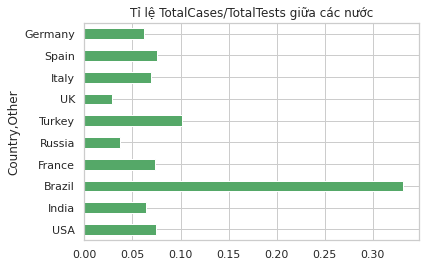

In [45]:
(df_10["TotalCases"]/df_10["TotalTests"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalCases/TotalTests giữa các nước")

        Brazil có số lượng xét nghiệm thấp hơn rất nhiều số ca mắc bệnh

### Tỉ lệ TotalTests/Population giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalTests/Population giữa các nước'}, ylabel='Country,Other'>

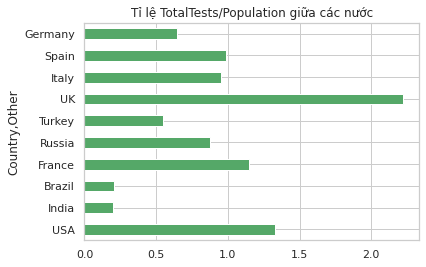

In [46]:
(df_10["TotalTests"]/df_10["Population"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalTests/Population giữa các nước")

        Anh và Mỹ có tỉ lệ người dân xét nghiệm covid trung bình lớn hơn nhiều so với các nước khác

### Tỉ lệ TotalRecovered/TotalCases giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalRecovered/TotalCases giữa các nước'}, ylabel='Country,Other'>

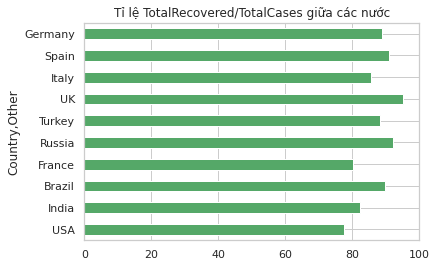

In [47]:
(df_10["TotalRecovered"]*100/df_10["TotalCases"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalRecovered/TotalCases giữa các nước")

        Tỉ lệ hồi phục ở các nước nói trên tương đối cao

### Tổng TotalDeaths,TotalRecovered, ActiveCases là TotalCases

<AxesSubplot:>

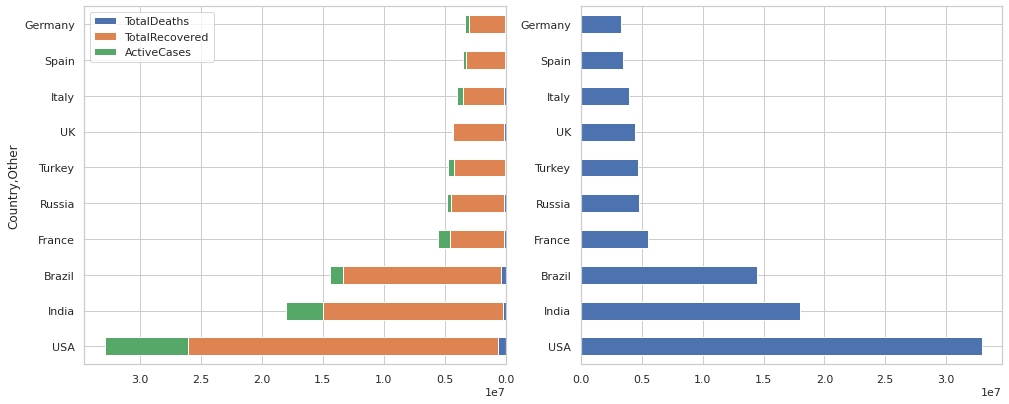

In [48]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(w_pad=-0.75)
df_10[["TotalDeaths", "TotalRecovered", "ActiveCases"]].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[0])
axs[0].set_yticks
axs[0].invert_xaxis()
df_10["TotalCases"].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[1], xlabel="")